## Loading Data from local file

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./XYmat.csv')

In [3]:
df.head(5)

,name,reviews,FPS,Gore,Action,Demons,Shooter,First-Person,Great Soundtrack,Multiplayer,...,Pool,Documentary,Word Game,Feature Film,Spelling,achievements,prices,Valve,Accounting,Number of genres
0,DOOM,92,1,1,1,1,1,1,1,1,...,0,0,0,0,0,54,19.99,0,0,1
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,1,0,1,0,1,1,0,1,...,0,0,0,0,0,37,29.99,0,0,3
2,BATTLETECH,71,0,0,1,0,0,0,1,1,...,0,0,0,0,0,128,39.99,0,0,3
3,DayZ,61,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,44.99,0,0,3
4,EVE Online,74,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0.00,0,0,5


In [4]:
df.columns

Index(['name', 'reviews', 'FPS', 'Gore', 'Action', 'Demons', 'Shooter',
       'First-Person', 'Great Soundtrack', 'Multiplayer',
       ...
       'Pool', 'Documentary', 'Word Game', 'Feature Film', 'Spelling',
       'achievements', 'prices', 'Valve', 'Accounting', 'Number of genres'],
      dtype='object', length=383)

In [5]:
df.index

RangeIndex(start=0, stop=11766, step=1)

In [6]:
df.values

array([['DOOM', 92, 1, ..., 0, 0, 1],
       ["PLAYERUNKNOWN'S BATTLEGROUNDS", 49, 1, ..., 0, 0, 3],
       ['BATTLETECH', 71, 0, ..., 0, 0, 3],
       ...,
       ['STAX', 99, 0, ..., 0, 0, 2],
       ['Chicken Farm 2K17 - Premium', 96, 0, ..., 0, 0, 3],
       ['TANE DLC - ZecRail 2017 Christmas Train', 100, 0, ..., 0, 0, 5]],
      dtype=object)

In [7]:
y = df['reviews'].values
array = df.to_numpy()
X = array[:, 2:]
print(X)

[[1 1 1 ... 0 0 1]
 [1 0 1 ... 0 0 3]
 [0 0 1 ... 0 0 3]
 ...
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 3]
 [0 0 1 ... 0 0 5]]


## Split train test data

In [8]:
num_train = len(df) // 10 * 7

Xtrain = X[:num_train]
Xtest = X[num_train:]
ytrain = y[:num_train]
ytest = y[num_train:]
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(8232, 381) (3534, 381) (8232,) (3534,)


## Test data with multiple linear regression

In [9]:
import scipy as sp
import scipy.sparse.linalg
import math

In [10]:
out = sp.sparse.linalg.lsqr(Xtrain,ytrain)
beta = out[0]
print(beta.shape)

(381,)


## Compute Baseline

In [11]:
yBaseline = np.ones(len(ytest)) * np.mean(ytrain)
errs = np.array(abs(ytest - yBaseline))
loss = np.sum(errs)
avgL = loss/len(ytest)
print("multiple variable loss="+"{:.2e}".format(avgL))

multiple variable loss=2.33e+01


In [12]:
## Compute loss with linear regression

In [13]:
yp = Xtest@beta

errs = np.array(abs(ytest - yp))
loss = np.sum(errs)
avgL = np.mean(avgL)

print("multiple variable loss="+"{:.2e}".format(avgL))

arr = []
for i in range(len(ytest)):
    arr.append(abs(yp[i]-ytest[i]))
arr.sort(reverse = True)
for i in range(50):
    print(arr[i])

multiple variable loss=2.33e+01
110.80326840456644
110.03635757012734
106.5454409496329
95.34250289431543
93.84333453636447
93.43438217285066
92.81871225985691
91.97453299332003
90.70044099562236
90.64691562348992
90.29307527310871
90.08951196869847
89.91825382082598
89.67944815996516
89.18390875667345
89.06680927930893
88.51788592698341
88.43999697608496
88.32490105844022
88.09538186990272
87.85303031336616
87.37669974809853
86.82780608008373
86.3474195307129
85.91484855194969
85.7328028624375
85.14148987022764
85.01584179429378
84.9621235639134
84.76659200474484
84.64843227508638
84.01291630051847
83.13544524170166
83.06508866607624
82.76983120887468
82.56446414100174
82.0767237877468
81.39319184891957
81.35060328825806
81.30330216171805
81.1044453536198
79.7799741046897
78.35317681288223
78.32095515634455
77.92288491904827
77.51180563328548
76.74608997124596
76.3254371891392
75.99872980337477
75.91772305769251


In [14]:
import matplotlib.pyplot as plt



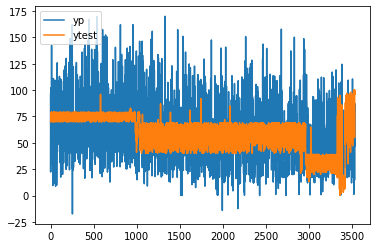

In [15]:


plt.plot(yp, label = "yp")
plt.plot(ytest, label = "ytest")
plt.legend(loc="upper left")
axes = plt.gca()
#axes.set_xlim([0,500])
#axes.set_ylim([0,150])
plt.show()

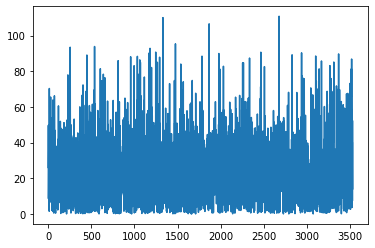

In [16]:
plt.plot(errs)

In [17]:
print(np.mean(errs))

23.558472177917505
